In [42]:
import os
from pathlib import Path
home = os.getcwd()
current = home
while 'data' not in os.listdir(current):
    current = Path(current).parent
DATA_FOLDER = os.path.join(current, 'data')

# Exploring the products data

In [43]:
import pandas as pd
products_csv = os.path.join(DATA_FOLDER, 'olist_products_dataset.csv') 
df = pd.read_csv(products_csv)
print(df.head())
# category, description length, photo_quality and weight
df.drop(columns=["product_length_cm", "product_height_cm", "product_width_cm"], inplace=True)

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [44]:
# since we have a relatively large amount of data we can actually drop any nan values
print(len(df))
print(len(df.dropna())) # we lose aounrd 600 samples; around 2% we can live with that
df = df.dropna()

32951
32340


In [45]:
import matplotlib.pyplot as plt 
# map each category by its name
cat_freq = df['product_category_name'].value_counts()
categories = sorted(df['product_category_name'].unique(), key=lambda x: cat_freq[x])
categories_map = {c: i for i, c in enumerate(categories)}
df_plot = df.copy()
df_plot['product_category_name'] = df['product_category_name'].map(categories_map)

In [46]:
df['product_category_name']

0                               perfumaria
1                                    artes
2                            esporte_lazer
3                                    bebes
4                    utilidades_domesticas
                       ...                
32946                     moveis_decoracao
32947    construcao_ferramentas_iluminacao
32948                      cama_mesa_banho
32949               informatica_acessorios
32950                      cama_mesa_banho
Name: product_category_name, Length: 32340, dtype: object

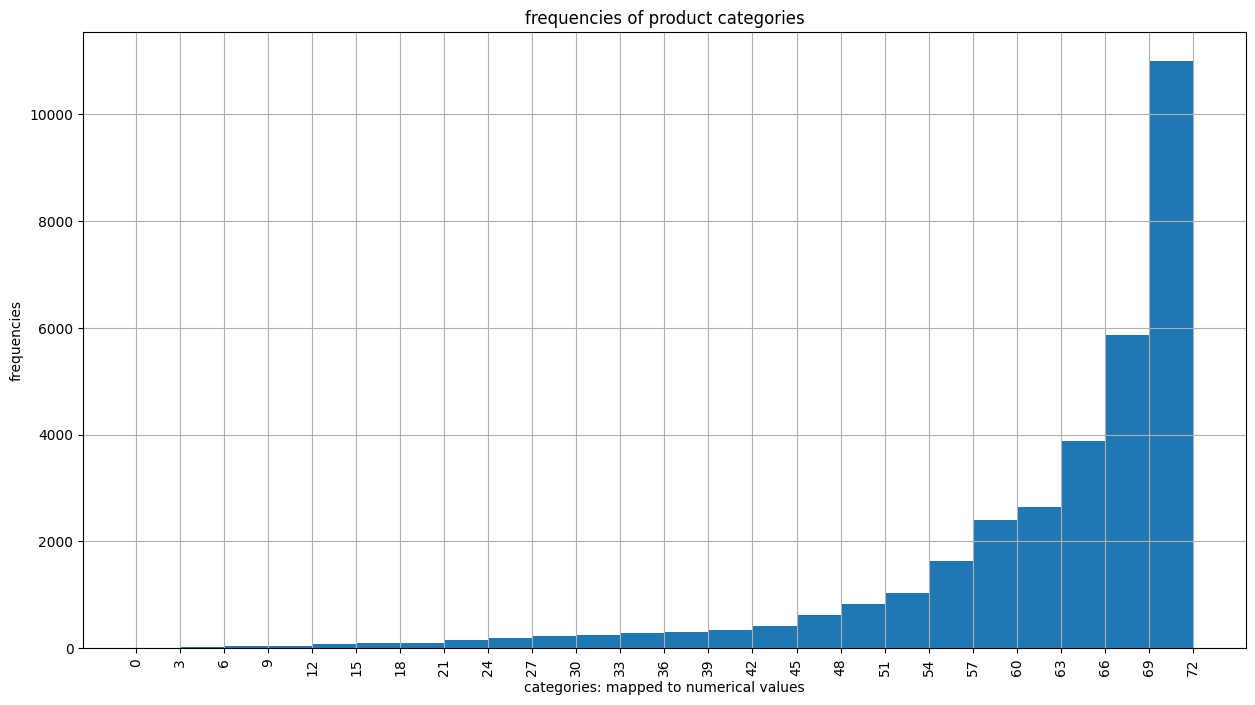

In [47]:
df_plot['product_category_name'].hist(bins=range(0, len(categories), 3), figsize=(15, 8))
plt.xticks(ticks=list(range(0, len(categories), 3)), rotation=90)
plt.xlabel('categories: mapped to numerical values')
plt.ylabel('frequencies')
plt.title('frequencies of product categories')
plt.show()
del(df_plot)

We can see that the distribution of product categories is quite skewed as few categories constitute the majority of the products sold on the platform. For further analysis, we will consider only categories with at least 500 products (500 is more than enough to possibly apply Central Limit Theorem)

In [48]:
product_categories = list(cat_freq[cat_freq > 500].index)
product_categories

['cama_mesa_banho',
 'esporte_lazer',
 'moveis_decoracao',
 'beleza_saude',
 'utilidades_domesticas',
 'automotivo',
 'informatica_acessorios',
 'brinquedos',
 'relogios_presentes',
 'telefonia',
 'bebes',
 'perfumaria',
 'papelaria',
 'fashion_bolsas_e_acessorios',
 'cool_stuff',
 'ferramentas_jardim',
 'pet_shop',
 'eletronicos']

In [49]:
df = df[df['product_category_name'].isin(product_categories)]
print(len(df))
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0


it seems that we kept (27007 / 32951) $\approx 82\%$ of the initial data. Great start !!

Time to translate the categories to English

In [51]:
# let's translate the categories from portogues to English 
from deep_translator import GoogleTranslator
import re
translator = GoogleTranslator(source='pt', target='en')
categories_english = [translator.translate(text=re.sub('_', ' ', t)) for t in product_categories]

In [55]:
df['product_category_name'] = df['product_category_name'].map(dict([(pt, en) for pt, en in zip(product_categories, categories_english)]))
df.head() 

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0
6,732bd381ad09e530fe0a5f457d81becb,cool stuff,56.0,1272.0,4.0,18350.0


In [56]:
prepared_data_folder = os.path.join(Path(DATA_FOLDER).parent, 'prepared_data') 
if not os.path.isdir(prepared_data_folder):
    os.makedirs(prepared_data_folder)
df.to_csv('products_prepared.csv', index=False)